# Introduction

This file will show us the ground truth that Ernest Provided in Matlab. Hopefully we can automate it a bit futher than this:

Previously we had mentioned about the ability for us to work with expectation across paths. This is a general case of the approach that Ernest
showed us in the previous meeting. 
Let us begin with:
$$
\begin{align*}
P(\text{error} | \Delta) &= \sum_{\rho\in \mathcal{P}} P(\epsilon , \rho | \Delta)\\
    &=\sum_{\rho\in \mathcal{P}} P(\epsilon | \rho , \Delta)P(\rho | \Delta)\\
    &=\sum_{\rho\in \mathcal{P}} P(\epsilon | \rho , \Delta)P_\Delta(\rho)\\
    &=\mathbb{E}\left[P(\epsilon | \rho , \Delta)\right]\\
\end{align*}
$$

Alas we obtain an expection of error $\epsilon$ over all the possible paths $\rho$. 

Let's expand each term for binary hypothesis testing as follows:
$$
\begin{align}
P(\epsilon | \rho, \Delta) &= P(\epsilon_{I} | \rho, \Delta) + P(\epsilon_{II} | \rho, \Delta)\\
    &= P(\hat{H} = 0 , H^*=1| \rho, \Delta) + P(\hat{H} = 1 , H^*=0| \rho, \Delta)\\
\end{align}
$$

A critical observation to be made here is that $\hat{H}|\rho \perp H^*|\rho$. This is because at the moment that we have observed our path $\rho$ the decision function collapases and becomes completely determined and independent of the hypothesis. 
Furthermore, the probability of selecting a hypothesis is such that $P(\hat{H}=i) \in \{0,1\}$. We thus end up with 
$$
\begin{align}
P(\epsilon|\rho,\Delta) &= P(\hat{H} = 0 | \rho, \Delta) P(H^* = 1 | \rho, \Delta) + P(\hat{H} = 1 | \rho, \Delta) P(H^* = 0 | \rho, \Delta)\\
    &= P(\hat{H} = 0 | \rho, \Delta) P(H^* = 1 | \rho, \Delta) + P(\hat{H} = 1 | \rho, \Delta) P(H^* = 0 | \rho, \Delta)\\
    &= P(\hat{H} = i | \rho, \Delta) P(H^* = j | \rho, \Delta) \\
    &= P(H^* = j | \rho, \Delta) \\
\end{align}
$$
Where only one term will be non-zero, the one where $P(\hat{H}|\rho, \Delta) = 1$



WIth Ernest's Derivation we have:

$$
\begin{align*}
P(\epsilon| \rho, \Delta) &= P(H^* = j | \rho, \Delta) =\frac{P(H^*=j, \rho|\Delta)}{P(\rho | \Delta)}\\
    &=\frac{P(\rho|H^*=j,\Delta)P(H^*=j|\Delta)}{P(\rho | \Delta)}\\
    &=\frac{P^{(j)}_\Delta(\rho)\frac{1}{|\mathcal{H}|}}{P(\rho | \Delta)}
\end{align*}
$$

Notice that the only stochasticity in this system comes from the prior for the hypotheses $\{\mathcal{H}_i\}^N$

**ACTUALLY** I think this is not quite correct. The probability of observing a path $\rho$ changes as the chain evolves.

Then for the numerator

$$
\begin{align*}
P(H^* = j, \rho| \Delta) &= P(\rho | H^* = j, \Delta)\frac{1}{|\mathcal{H}|}\\
    &= P(S_1 = 0, S_0 = 0 | H^* = j , \Delta)\frac{1}{|\mathcal{H}|}\\
    &= P(S_1 = 0| S_0 = 0 , H^* = j , \Delta)P(S_0 = 0 | H^* = j, \Delta)\frac{1}{|\mathcal{H}|}\\
    &= P(S_1 = 0| S_0 = 0 , H^* = j , \Delta)1\frac{1}{|\mathcal{H}|}\\
\end{align*}
$$

Okay so we can go back to the way $\rho$ changes as the chain evolves. For now, we can simplify the denum as :

$$
\begin{align*}
P(\rho|\Delta) &= P(S_1 = 0 , S_0 = 0 | \Delta)\\
    &= \sum P(S_1 = 0, S_0 = 0 , H_i| \Delta)\\
    &= \sum P(S_1 = 0, S_0 = 0|H_i,\Delta)P(H_i|\Delta)\\
    &= \sum P(S_1 = 0| S_0 = 0,H_i,\Delta)P(S_0 = 0|H_i,\Delta)\frac{1}{|H_i|}\\
    &= \sum P(S_1 = 0| S_0 = 0,H_i,\Delta)1\frac{1}{|H_i|}\\
\end{align*}
$$

Then In that we case for when preference is for $\mathcal{H}_1$.

$$
P(\epsilon | \rho, \Delta) = \frac{P(S_1 = 0| S_0 = 0 , H^* = j , \Delta)}{\sum P(S_1 = 0| S_0 = 0,H_i,\Delta)}
$$
$$
P(\epsilon | \rho, \Delta) = \frac{P^j_\Delta(S_1 = 0| S_0 = 0)}{\sum P^i_\Delta(S_1 = 0| S_0 = 0)}
$$



Now hhere is where i am not entirely sure about my derivation. 

Tying it all together we have 

$$
\begin{align}
P(\epsilon| \Delta) &= \mathbb{E}\left[P(\epsilon|p,\Delta)\right]\\
    &= \mathbb{E}\left[\frac{P^{(j)}_\Delta(\rho)\frac{1}{|\mathcal{H}|}}{P(\rho | \Delta)}\right]
\end{align}
$$

# Lets Test This with Code

In [6]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import datetime
import argparse
from sklearn.metrics import roc_curve
from math import factorial
from scipy.linalg import expm
import sp_sims
from sp_sims.simulators.stochasticprocesses import *
from sp_sims.statistics.statistics import *
from sp_sims.estimators.algos import *
from IPython.display import clear_output
from sp_sims.sanitycheck.truebirthdeath import *
#from sp_sims.utils.utils import *
import random
from tqdm import tqdm
from time import sleep
import time

In [200]:
import importlib
importlib.reload(sp_sims.simulators.stochasticprocesses)
importlib.reload(sp_sims.statistics.statistics)

<module 'sp_sims.statistics.statistics' from '/Users/rac716/Research/RL_RateOptimization/sp_sims/statistics/statistics.py'>

In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prepping

In [34]:
# We may change args here:
class Args:
  xres = 100
  length = 3000# Number of transitions in continuous chain 
  state_limit = 1#Inclusive
  init_state = 0
  num_samples =2
  detection_guesses =10000
args = Args()

In [8]:
# Some Util Functions
def take_a_guess(tape, p0, p1):
    num = 0
    denum = 0
    # num = 1
    # denum = 1
    for i in range(len(tape)-1):
        from_state = tape[i]
        to_state = tape[i+1]
        # num  *= p0[from_state,to_state]
        # denum *= p1[from_state,to_state]
        num += np.log(p0[from_state,to_state])
        denum += np.log(p1[from_state,to_state])

    return 0 if num > denum else 1
def return_ls(tape, p0, p1):
    num = 1
    denum = 1
    for i in range(len(tape)-1):
        from_state = tape[i]
        to_state = tape[i+1]
        num  *= p0[from_state,to_state]
        denum *= p1[from_state,to_state]
    return num,denum
def stats_for_single_22paths(sts,hts,samp_rate, p0s, p1s, path = [0,0]):
    # Take all Paths 
    # This count how many i->j transitiosn per hypothesis are encountered
    hyp_counts = np.zeros(2) # 2 For 2 number of hypothesis
    # Dice them for sampling rates
    for i,p in enumerate(sts):
        idx_true_hyp = true_values[i]
        sampled_tape = quick_sample(samp_rate, sts[i],hts[i])

        count = ((tmpSampTape[:-1] == path[0]) & (tmpSampTape[1] == path[1])).sum()
        hyp_counts[idx_true_hyp] += count

    return hyp_counts


In [43]:
# Some Setup 
#rates0 = {"lam": 2/10,"mu":4/10}
#rates1 = {"lam": 100/10,"mu":120/10}
np.random.seed(int(time.time()))
rates0 = {"lam": 1,"mu":1.5}
rates1 = {"lam": 0.1,"mu":0.2}
rates = [rates0,rates1]
samp_rates = np.logspace(-3,5,args.xres, base=2)
tgm0 = np.array([[-rates0['lam'],rates0['lam']],[rates0['mu'],-rates0['mu']]])
tgm1 = np.array([[-rates1['lam'],rates1['lam']],[rates1['mu'],-rates1['mu']]])


hts, sts = ([],[])
last_times  = []
true_values = np.random.choice(2,args.detection_guesses)
# Generate The Tapes
for i in range(args.detection_guesses):
    roe = RaceOfExponentials(args.length,rates[true_values[i]],state_limit=args.state_limit)
    holdTimes_tape, state_tape = roe.generate_history(args.init_state)
    hts.append(holdTimes_tape);
    sts.append(state_tape)
    last_times.append(np.cumsum(holdTimes_tape)[-1])


In [20]:
# Preparation of True Probabilities
true_p0s = []
true_p1s = []
fixed_guesses = np.ones((len(samp_rates), args.detection_guesses))
# Crete all the *known* probability functions.
for srIdx, cur_samp_rate in enumerate(samp_rates):
    true_p0s.append(expm(tgm0*(1/cur_samp_rate)))
    true_p1s.append(expm(tgm1*(1/cur_samp_rate)))

# Sampling of Paths

## For a Particular Path $(0\to0)$

In [24]:
# This is all we Need
fixed_state_tape = [0,0]
fixed_true_values= np.random.choice(2,args.detection_guesses)

# Take Our Guesses
guesses = np.zeros((len(samp_rates), args.detection_guesses))
for i in tqdm(np.arange(args.detection_guesses)):
    # Prepare for Decimation: First sample with the quickest rate. -> Smallest Unit of Time Interval
    sampled_tape = fixed_state_tape # Yes, a bit hacky
    # Go Over the 
    for srIdx, cur_samp_rate in enumerate(samp_rates):
        # Fetch Values for Current Rate
        true_p0 = true_p0s[srIdx]
        true_p1 = true_p1s[srIdx]
        true_ps = [true_p0,true_p1]
        
        # How many of the baseline intervals fit into the slow rate interval
        decimateInterval = int(base_samp_rate/cur_samp_rate)
        tmpSampTape = sampled_tape[0::decimateInterval]
        ############################################
        # Limit the NUmebr of Samples
        ############################################
        fixed_guesses[srIdx, i] = take_a_guess(sampled_tape, true_p0, true_p1)
        l0, l1 = return_ls(sampled_tape, true_p0, true_p1) # Shall not use this as it results in very small quantities
        # l0 = return_lr(limited_sampled_tape, true_p0, true_p1)
        # l1 = 1
        ###################################################################
        # Add Per Sample
        #l0Vcs[srIdx, i] = l0
        #l1cs[srIdx, i] = l1

100%|██████████| 100/100 [00:00<00:00, 3529.07it/s]


## For Any Path

In [30]:
########################################
# Generation
########################################
base_samp_rate = samp_rates[-1]
# LIkelihoods in 2D. On First Axis Sampling Rates, On Second Axis number of guesses
# Go Over the Detection Guesses
path_of_interest = [0,0]
print("Sampling at fastest rate : ", base_samp_rate)
#sampled_tapes = (quick_sample(base_samp_rate, sts[0],hts[0]), quick_sample(base_samp_rate, sts[1],hts[1]))
sampled_tapes = []
for i in tqdm(range(len(sts))):
    sampled_tapes.append(quick_sample(base_samp_rate, sts[i],hts[i]))
#sampled_tapes = (simple_sample(base_samp_rate, sts[0],hts[0],max_samples=args.max_samples), simple_sample(base_samp_rate, sts[1],hts[1], max_samples=args.max_samples))
print("Decimating and collecting stats...")

Sampling at fastest rate :  32.0


100%|██████████| 100/100 [04:42<00:00,  2.83s/it]

Decimating and collecting stats...


In [14]:
len(sampled_tapes[0])

80380

In [44]:
# Do Decimation here.
l0cs = np.zeros((len(samp_rates), args.detection_guesses))
l1cs = np.zeros((len(samp_rates), args.detection_guesses))
guesses = np.zeros((len(samp_rates), args.detection_guesses))
path_hyp_counts = np.zeros((len(samp_rates),2)) # 2 for number of hypothesis
totpath_hyp_counts = np.zeros((len(samp_rates),2)) # 2 for number of hypothesis
shortest_path =  np.inf
for i in tqdm(np.arange(args.detection_guesses)):
    idx_true_hyp = true_values[i]
    # Prepare for Decimation: First sample with the quickest rate. -> Smallest Unit of Time Interval
    # Go Over the 
    for srIdx, cur_samp_rate in enumerate(samp_rates):
        # Fetch Values for Current Rate
        
        # How many of the baseline intervals fit into the slow rate interval
        decimateInterval = int(base_samp_rate/cur_samp_rate)

        displacement = 0
        sampling_point = displacement+ (1/cur_samp_rate)

        # Look For Holding Time
        cumtimes = np.cumsum(hts[i])
        idx_state = np.searchsorted(cumtimes,sampling_point)
        count = sts[i][idx_state] == path_of_interest[1]
        
        shortest_path = np.min([len(tmpSampTape), shortest_path])

        path_hyp_counts[srIdx,idx_true_hyp] += count

# Some Stats 
print("Shortest Length of path is: ",shortest_path)

100%|██████████| 10000/10000 [00:20<00:00, 480.45it/s]

Shortest Length of path is:  81101.0


## Debugging/Stats

In [146]:
print("The sampled tapes for each 0 and 1 have different shapes")
print(sampled_tapes[0].shape)
print(sampled_tapes[1].shape)

The sampled tapes for each 0 and 1 have different shapes
(213214,)
(1909756,)


In [ ]:
# Let me see both of these
di = int(base_samp_rate/1)
meep0 = sampled_tapes[0][0::di]
meep1 = sampled_tapes[1][0::di]
plt.plot(np.linspace(0,833,833), meep0)
count0 = ((meep0[:-1] == path_of_interest[0]) & (meep0[1:] == path_of_interest[1])).sum()
count1 = ((meep1[:-1] == path_of_interest[0]) & (meep1[1:] == path_of_interest[1])).sum()
print("Hyp0 count is: {} out of {} total transitions".format(count0,832))
print("Hyp1 count is: {} out of {} total transitions".format(count1,832))
plt.show()

This is for parameters :  {'lam': 0.1, 'mu': 0.2}
Printing Frome:  1984


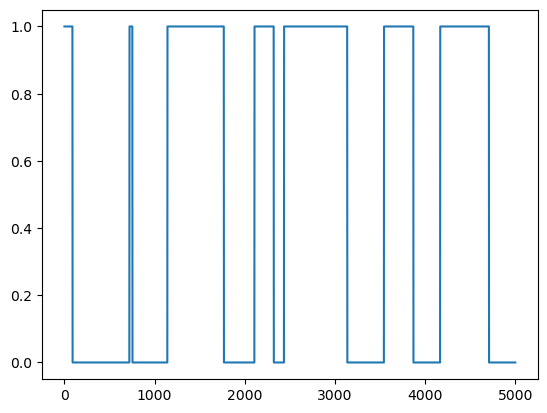

In [120]:
print("This is for parameters : ", rates[true_values[-1]])
window = 5000
init_place = int(np.random.choice(len(tmpSampTape)-window,1))
print("Printing Frome: ", init_place)
rango = tmpSampTape[init_place:init_place+window]
plt.plot(range(len(rango)), rango)
plt.show()

# Data Processing

## Single Path Error Probability

At this point we want to test the single error equation that we derived before:

$$
P(\epsilon| \rho, \Delta) =\frac{P^{(j)}_\Delta(\rho)\frac{1}{|\mathcal{H}|}}{P(\rho | \Delta)}
$$


In [18]:
# For A single Path
fixed_fprs = []
fixed_fnrs = []

# For each Guess Run, what is the correct hypothesis.
num_tnegs = np.sum(true_values == 0)#TN + FP
num_tpos = np.sum(true_values == 1)#TP + FN

for srIdx, cur_samp_rate in enumerate(samp_rates):
    # Will be fixed for a fixed path
    guesses = fixed_guesses[srIdx]

    hits_index = (true_values == guesses)
    tp = (true_values[hits_index] == 1).sum()
    tn = (true_values[hits_index] == 0).sum()
    
    # Type I and II errors.
    fixed_fprs.append((num_tnegs-tn)/(num_tnegs))
    fixed_fnrs.append((num_tpos-tp)/(num_tpos))# Type 2 Error


NameError: name 'fixed_guesses' is not defined

In [ ]:
# Lets start graphing:
print(fixed_fprs)
print(fixed_fnrs)

100%|██████████| 100/100 [00:00<00:00, 123762.29it/s]


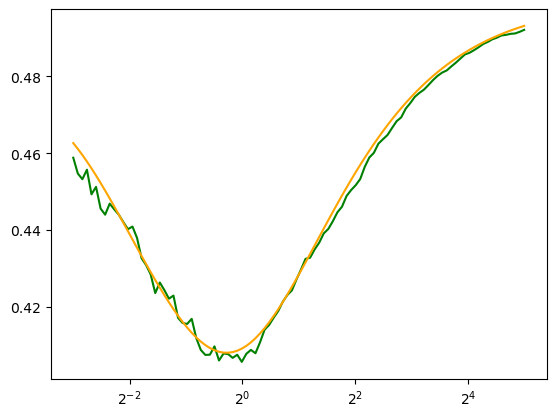

In [45]:
# Graphy Graph

#P(error | path, \Deleta)
tperror = np.zeros(len(samp_rates))
bloop = []
numerical_errors = []
# For Now we will focus on Type I error  because H1 should always be preferred. 
for i in tqdm(np.arange(len(samp_rates))):
    sr = samp_rates[i]
    #num = true_p1s[i][0,0] if true_p0s[i][0,0] > true_p1s[i][0,0] else true_p0s[i][0,0]
    num = true_p0s[i][0,0] 
    denum = true_p0s[i][0,0] + true_p1s[i][0,0]
    tperror[i] = num/denum


# Get the Numerical Erros
numerical_errors = (path_hyp_counts[:,0]) / (path_hyp_counts).sum(axis=1)

plt.plot(samp_rates, numerical_errors,color='green')
plt.plot(samp_rates, tperror, color='orange')
plt.xscale('log',base=2)
#plt.ylim((0,1))
plt.show()


In [ ]:
path_hyp_counts[:,0]/totpath_hyp_counts[:,0]

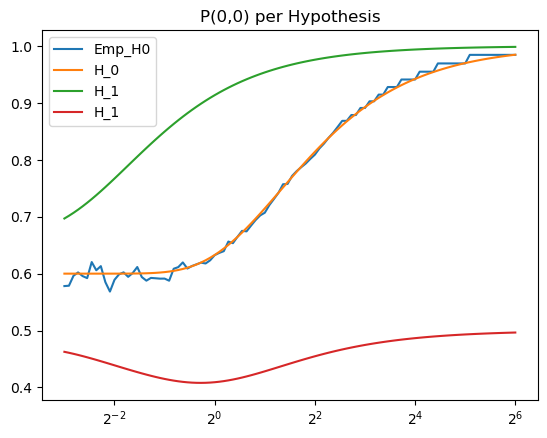

In [13]:
# See If Probabilities Change:
p00_0s = np.array([p[0,0] for p in true_p0s])
p00_1s = np.array([p[0,0] for p in true_p1s])

# Numerical(Excellent this agrees)
plt.plot(samp_rates, path_hyp_counts[:,0]/totpath_hyp_counts[:,0], label="Emp_H0")

# Theoretical 
plt.plot(samp_rates, p00_0s, label="H_0")
plt.plot(samp_rates, p00_1s, label="H_1")
plt.plot(samp_rates, p00_0s/(p00_0s+p00_1s), label="H_1")
plt.legend()
plt.title("P(0,0) per Hypothesis")
plt.xscale('log',base=2)
plt.show()
# Clearym in our particular case H1 is superior than Hypothesis 0 for every single sampling rate. 

In [ ]:
for i,j in enumerate(samp_rates):
    clear_output(wait=True)
    print(fixed_fprs[i])
    print(fixed_guesses[i])
    print(true_p0s[i])
    print(true_p1s[i])
    sleep(0.1)

## General Path Error Probability

In [27]:
########################################
# Process the Results
########################################
# Number of true positive and negatives
num_tnegs = np.sum(true_values == 0)#TN + FP
num_tpos = np.sum(true_values == 1)#TP + FN

# Our main stars here
fprs = [] # False Positive Rates
fnrs = [] # False Negative Rates

# At this point we have our guesses saved
# Loop through all Sampling Rates we have used
for srIdx, cur_samp_rate in enumerate(samp_rates):
    # For Plotting ROC Curve
    guess = guesses[srIdx]
    # Take likelihoods for this sampling rate
    l0c = l0cs[srIdx]
    l1c = l1cs[srIdx]

    # Hits and True Probabilities
    hits_index = (true_values == guess)
    tp = (true_values[hits_index] == 1).sum()
    tn = (true_values[hits_index] == 0).sum()

    # Correct
    sensitivities.append(tp/num_tpos)
    invspecificities.append(1-(tn/num_tnegs))

    # False Positive and Negative Rates
    fprs.append((num_tnegs-tn)/(num_tnegs))
    fnrs.append((num_tpos-tp)/(num_tpos))# Type 2 Error

    
    #This section for H0 case
    # I dont knwo why Ernest focuses on when we get it right
    # idxLocs = (true_values == 0)
    # lInterest = l0c[idxLocs]# Just get the one of interest
    lInterest = l0c

    l0s.append(np.mean(lInterest))
    v0s.append(np.std(lInterest))
    mi0s.append(np.min(lInterest))
    ma0s.append(np.max(lInterest))
    
    #This section for H1 case
    # # Again same as above
    # idxLocs = (true_values == 1)
    # lInterest = l1c[idxLocs] # Get Likelihood 1
    lInterest = l1c

    l1s.append(np.mean(lInterest))
    v1s.append(np.std(lInterest))

    mi1s.append(np.min(lInterest))
    ma1s.append(np.max(lInterest))

    num_hits = (true_values == guess).sum()
    hit_rates.append(num_hits/args.detection_guesses)


/var/folders/_c/l7slpvfj7f1f3xrbzl_7c9440000gn/T/ipykernel_11434/1895533920.py:22: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  hits_index = (true_values == guess)


NameError: name 'sensitivities' is not defined

# Policy Gradient Algorithms
In this section we will implement policy gradient algorithms, and if necessary we will do PPO. 

There is nothing episodic about our run and environment. We may think of our environment as a simple bandit environmen in the sense that there is only a single step. 
However, Policy Gradients may still work in these cases. 

Because there is a temporal element to ours sequences we might be inclide to use RNNs to encode them into a hidden vector from
which we can infer the optimal action. 

An extra bit of caveat that we must mention is that we work with actions in continuous space. In these cases I have read that it Bayesian Networks are used. More specficically 
we could draw actions from teh gaussian distribution. In this caswe would learn an appropriate mean and standard deviation. 

In [1]:
import torch
from torch import nn

In [ ]:
states = torch.tensor([1,2,5,1])
holdtimes = torch.tensor([3.123,0.121,123.1,131]).view(4,1)
hawt = torch.nn.functional.one_hot(states)
print(hawt)
new_one = torch.concat((hawt,holdtimes),dim=1)
print(new_one)

## Define the Model

In [2]:
class RNNContinuousPolicy(nn.Module):
    def __init__(self, num_states):
        self.state_limit = num_states
        self.rnn = nn.LSTM(num_states,20,3)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, X):
        # Prepping
        states, holdTimes = X
        holdTimes = holdTimes.view(len(holdTimes),1)
        inputs = torch.concat((hawt_states, holdTimes),dim=1)

        _,(hiddn, _) = self.rnn(inputs)
        output = self.fc(hiddn.squeeze(0))
        # We are giving X as a 

# Critic Network
class Critic(nn.Module):
    def __init__(self, state_size, action_size, hidden_size):
        super(Critic, self).__init__()
        # State is One Hot Encoded
        self.fc1 = nn.Linear(state_size + action_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, state, action):
        x = torch.cat((state, action), dim=1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
# Replay buffer
class ReplayBuffer:
    def __init__(self, buffer_size, batch_size):
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["hidden_state", "samp_rate", "errors" ])

    def add(self, state, action, loss):
        e = self.experience(state, action, reward)
        self.memory.append(e)

    def sample(self):
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float()
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float()
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float()

        return states, actions, rewards

    def __len__(self):
        return len(self.memory)

## Setup

In [4]:
# Create the Datasets
# We may change args here:
class Args2:
  xres = 100
  length = 100# Number of transitions in continuous chain 
  state_limit = 1#Inclusive # DO NOT CHANGE, Architecture can't take it yet
  init_state = 0
  num_samples =2
  learning_rate = 1e-3
  clipping_limit = 64 # Sampling rate no Bigger than this. 
  detection_guesses =10000
  num_epochs = 100
  num_replay_samples = 1 # How many batches do we sample at a time to learn 
args2 = Args2()

In [ ]:
# Function For Generating a Batch
def get_batch(num_sequences, length, num_states, tvals):
    # maybe for slower chains we will want to 
    num_states = qmatrix.shape[0]

    # Null Hyp
    rates0 = np.random.chisquare(df=2, size =(num_sequences,2))
    rates0[:,1] = np.sum(rates,dim=1) # So that mu > lam

    # Alter Hyp
    rates1 = np.random.chisquare(df=2, size =(num_sequences,2))
    rates1[:,1] = np.sum(rates,dim=1) # So that mu > lam

    rates = [rates0,rates1]
    rates = torch.from_numpy(rates)
    batch =  torch.array((num_sequences,length,num_states))

    for i in range(args2.detection_guesses):
        # Generate State and Holding Times
        roe = RaceOfExponentials(args2.length,rates[tvals[i]],state_limit=args2.state_limit)
        holdTimes_tape, state_tape = roe.generate_history(args2.init_state)
        #hts.append(holdTimes_tape);
        #sts.append(state_tape)

        # Generate
        hawt_states = torch.nn.functional.one_hot(state_tape).T# Transpose it
        hawt_states *= torch.tensor(holdTimes_tape)
        batch[i,:,:] = hawt_states


    return  batch, rates


def get_errors(sampled_tapes, probs, true_hyps):
    # Clean it up 
    p0, p1 = probs
    # Take our guesses
    guesses = np.array([take_a_guess(tape, p0,p1) for tape in sampled_tapes])
    errors = (true_hyps != guesses).sum()
    return tape


def take_a_guess(tape, rate):
    num = 0
    denum = 0
    for i in range(len(tape)-1):
        from_state = tape[i]
        to_state = tape[i+1]
        num += np.log(p0[from_state,to_state])
        denum += np.log(p1[from_state,to_state])
    return 0 if num > denum else 1

## Bootstrap the Replay Buffer

In [ ]:
# Replay buffer stores (s,a,r,s',d)
# Meaning the Hidden State we se the action we took and the corresponding reward
def populate_replayBuffer(args,rbuffer,num_to_add):
    
    ## Start By Generating States
    # TODO: Maybe Try Uniform
    # Null Hyp
    rates0 = np.random.chisquare(df=2, size =(num_sequences,2))
    rates0[:,1] = np.sum(rates,dim=1) # So that mu > lam
    # Alter Hyp
    rates1 = np.random.chisquare(df=2, size =(num_sequences,2))
    rates1[:,1] = np.sum(rates,dim=1) # So that mu > lam

    true_hyps = np.random.choice(2,num_to_add)

    # Get Fully Labeled Data (Observe State)
    sts, hts = ([],[])
    for i in range(num_to_add):
        roe = RaceOfExponentials(args2.length,rates[true_hyps[i]],state_limit=args2.state_limit)
        holdTimes_tape, state_tape = roe.generate_history(args2.init_state)
        sts.append(holdTimes_tape)
        hts.append(holdTimes_tape)

    # Get the Batch
    #batch, rates = get_batch(num_to_add, length, args.state_limit, true_hyps)
    
    # Build The Probabilities
    p0s,p1s = torch.array((num_to_add, 2, 2)), torch.array((num_to_add,2,2))
    for i in range(rates[0]):
        rate0, rate1 = (rates[0],rates[1])
        p0s[i,:,:] = np.expm(np.array([[-rates0[0],rates0[0]],[rates0[1],-rates0[1]]]))# 0=lam, 1=mu
        p1s[i,:,:] = np.expm(np.array([[-rates1[0],rates1[0]],[rates1[1],-rates1[1]]]))


    ## Action Selection
    # Beta Policy: Just Randomly Pick Sampling Rates from some interval(prolly uniformly)
    smp_rates = np.random.uniform(0,64) 
    
    # Action Performance(Sampling At Rate)
    samples = [ quick_sample(rate) for i,rate in enumerate(rates)]

    # Get the corresponding Losses
    errors = get_errors(samples, probs = (p0s,p1s) )

    for i,st in enumerate(sts):
        rbuffer.add(st, )

In [ ]:
# Start Working on the Model
policy = RNNContinuousPolicy(args2.state_limit)

rbuffer = ReplayBuffer(1024,32)
populate_replay_buffer(rbuffer)

# We have Enough Data to Start Sampling and Exploring With 
for e in range(args2.num_epochs) True:
    ########################################
    # Collect Data
    ########################################
    # This loop will generate paths with the existing policy 
    # Sample Transitions used for learnign
    states, actions, rewards = rbuffer.sample()

    optimizer = optim.Adam(model.parameters(), lr = args.learning_rate)
    # Since We We are Doing Accuracy We have to create 
    for i in range(args.num_replay_samples):
        ########################################
        # Update Networks
        ########################################
        # Generate Input
        true_hyps = np.random.choice(2,args.detection_guesses)
        roe = RaceOfExponentials(args2.length,rates[true_hyps[i]],state_limit=args2.state_limit)
        holdTimes_tape, state_tape = roe.generate_history(args2.init_state)

        # Sample an Action 
        predicted_samp_rates = torch.clip(model(sts,hts), 

        # Execute the Given Action through Sampling 
        sampled_tapes = [quick_sample(action_samprates[i], sts[0], hts[0], samp_budget=2) for i in range(sts.shape[[0]])]
        error = get_errors(sampled_tapes)

        # Feed the Reward to the Reinforce Algorithm 
        loss_phi = 

        # Learn 

        # Redo 

In [ ]:
# Runtthe Model 
model = Model()

## More Generally:


$$
\begin{align}
P(\epsilon|\rho,\Delta) &= \sum_i \sum_j P(\hat{H} = i | \rho, \Delta) P(H^* = j | \rho, \Delta)\\
    &= \sum_j P(H^* = j | \rho, \Delta)\\
    &= \sum_j P(H^* = j | \rho, \Delta)\\
\end{align}
$$

We may then say that 

In This file we will